# Compliance Radar – Main Notebook

Machine Learning 2025/2026 – LUISS Guido Carli

This notebook follows the project structure required by the course:
1. Data loading
2. Exploratory Data Analysis (EDA)
3. Preprocessing & feature engineering
4. Model training & cross-validation
5. Evaluation & interpretability
6. Conclusions & insights


## 0. Setup & Imports

Run this cell first to load all required libraries.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import shap

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)


## 1. Data Loading

We load the SQLite database `org_compliance_data.db` from the `data/` folder and inspect the available tables.

In [4]:
from sqlalchemy import inspect

db_path = "data/org_compliance_data.db"
engine = create_engine(f"sqlite:///{db_path}")

inspector = inspect(engine)
tables = inspector.get_table_names()

print("Tables in database:", tables)


Tables in database: ['data_dictionary', 'departments', 'high_risk_departments', 'risk_summary_by_division']


## 2. Exploratory Data Analysis (EDA)

_Teammate A:_ add histograms, boxplots, counts, and correlation heatmaps here once `df` is defined.

In [ ]:
# Example EDA template (uncomment once df is defined)
# display(df.head())
# display(df.describe(include="all"))

# numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
# df[numeric_cols].hist(bins=30, figsize=(12, 8))
# plt.tight_layout()
# plt.show()

# corr = df[numeric_cols].corr()
# sns.heatmap(corr, annot=False, cmap="coolwarm")
# plt.title("Correlation heatmap")
# plt.show()


## 3. Preprocessing & Feature Engineering

Here we define:
- target variable `y`
- feature matrix `X`
- train/test split
- scaling/imputation if needed.

In [ ]:
# Example template – adapt based on your actual columns
# target_col = "<TARGET_COLUMN_NAME>"  # TODO: replace with real target name
# feature_cols = [c for c in df.columns if c != target_col]

# X = df[feature_cols]
# y = df[target_col]

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


## 4. Model Training & Cross-Validation

Here we train at least 3 models: Logistic Regression, Random Forest, XGBoost.

_You (Petra) handle this part._

In [ ]:
# Example placeholder – replace with real code once X_train_scaled / y_train exist

# log_reg = LogisticRegression(max_iter=1000)
# rf = RandomForestClassifier(random_state=42)
# xgb = XGBClassifier(random_state=42, eval_metric="logloss")

# models = {
#     "Logistic Regression": log_reg,
#     "Random Forest": rf,
#     "XGBoost": xgb
# }

# results = []
# for name, model in models.items():
#     model.fit(X_train_scaled, y_train)
#     y_pred = model.predict(X_test_scaled)
#     y_proba = model.predict_proba(X_test_scaled)[:, 1]

#     acc = accuracy_score(y_test, y_pred)
#     prec = precision_score(y_test, y_pred)
#     rec = recall_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)
#     auc = roc_auc_score(y_test, y_proba)

#     results.append([name, acc, prec, rec, f1, auc])

# results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1", "AUC"])
# display(results_df)


XGBoost + Interpretability (Koray)

Loading 'departments' table from database...
Dataset shape: (709, 37)
Categorical features: ['dept_id', 'dept_name', 'dept_category', 'division', 'dept_type', 'location_type', 'team_size', 'reporting_structure', 'primary_function', 'secondary_function', 'creation_reason', 'oversight_body']
Numeric features: ['dept_age_years', 'manager_experience_level', 'supervisor_experience_level', 'reporting_lag_days', 'training_hours_quarterly', 'violations_past_3years', 'remediation_plan_active', 'executive_support', 'external_consulting', 'engagement_programs', 'onboarding_program', 'improvement_commitment', 'digital_systems', 'external_partnerships', 'interdept_collaboration_score', 'resource_availability_score', 'external_interactions_frequency', 'risk_exposure_operational', 'risk_exposure_financial', 'operational_health_index', 'reporting_gaps_annual', 'audit_score_q1', 'audit_score_q2', 'overall_risk_score']
Train size: (567, 36) Test size: (142, 36)
XGBoost baseline metrics: {'accuracy': 0.9

/workspaces/Machine-Learning-2025-2026---Group-Project/venv/lib/python3.10/site-packages/xgboost/training.py:199: UserWarning: [20:19:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1764148544963/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Machine-Learning-2025-2026---Group-Project/venv/lib/python3.10/site-packages/xgboost/training.py:199: UserWarning: [20:19:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1764148544963/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Machine-Learning-2025-2026---Group-Project/venv/lib/python3.10/site-packages/xgboost/training.py:199: UserWarning: [20:19:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1764148544963/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterat

Best parameters for XGBoost: {'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 200}
XGBoost tuned metrics: {'accuracy': 0.9295774647887324, 'precision': 0.8571428571428571, 'recall': 0.9818181818181818, 'f1': 0.9152542372881356, 'auc': 0.9585161964472311}


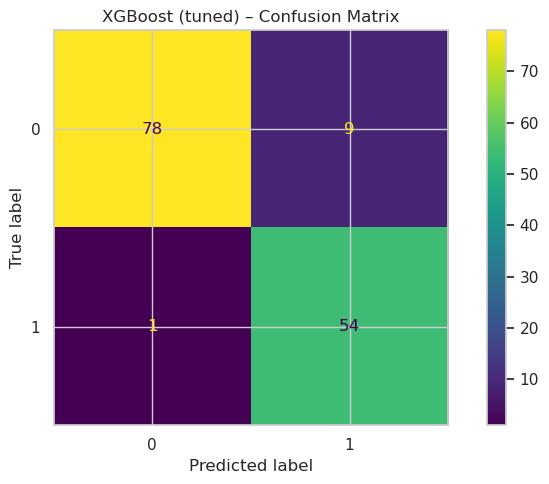

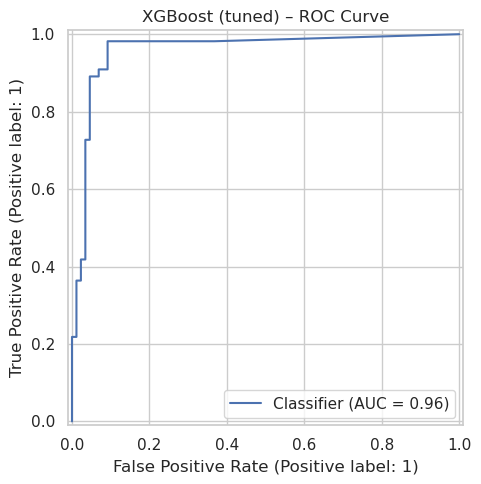

/workspaces/Machine-Learning-2025-2026---Group-Project/venv/lib/python3.10/site-packages/xgboost/training.py:199: UserWarning: [20:19:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1764148544963/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


ValueError: could not convert string to float: '[3.8624337E-1]'

In [5]:
# ============================================================)
# ============================================================


try:
    df
except NameError:
    print("Loading 'departments' table from database...")
    df = pd.read_sql("SELECT * FROM departments", engine)

print("Dataset shape:", df.shape)


# Binary target: high risk if final score < 70
df["risk_flag"] = (df["compliance_score_final"] < 70).astype(int)

target_col = "risk_flag"

# VERY IMPORTANT: drop both the target and the original score from features
drop_cols = [target_col, "compliance_score_final"]

X = df.drop(columns=drop_cols)
y = df[target_col]

categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = X.select_dtypes(include=["int64", "float64", "float32"]).columns.tolist()

print("Categorical features:", categorical_cols)
print("Numeric features:", numeric_cols)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ]
)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)


from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)

def evaluate_classifier(y_true, y_pred, y_proba):
    """
    Returns a dict with standard classification metrics.
    """
    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred),
        "recall": recall_score(y_true, y_pred),
        "f1": f1_score(y_true, y_pred),
        "auc": roc_auc_score(y_true, y_proba),
    }


from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

xgb_baseline = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

xgb_baseline_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", xgb_baseline)
])

xgb_baseline_pipeline.fit(X_train, y_train)

y_pred_xgb_base = xgb_baseline_pipeline.predict(X_test)
y_proba_xgb_base = xgb_baseline_pipeline.predict_proba(X_test)[:, 1]

xgb_baseline_metrics = evaluate_classifier(y_test, y_pred_xgb_base, y_proba_xgb_base)
print("XGBoost baseline metrics:", xgb_baseline_metrics)


from sklearn.model_selection import GridSearchCV

xgb_for_tuning = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

param_grid_xgb = {
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 7],
    "n_estimators": [100, 200, 300],
}

xgb_pipeline_for_cv = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", xgb_for_tuning)
])

grid_search_xgb = GridSearchCV(
    estimator=xgb_pipeline_for_cv,
    param_grid={
        "model__learning_rate": param_grid_xgb["learning_rate"],
        "model__max_depth": param_grid_xgb["max_depth"],
        "model__n_estimators": param_grid_xgb["n_estimators"],
    },
    scoring="f1",
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search_xgb.fit(X_train, y_train)

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)
best_xgb_pipeline = grid_search_xgb.best_estimator_

y_pred_xgb_best = best_xgb_pipeline.predict(X_test)
y_proba_xgb_best = best_xgb_pipeline.predict_proba(X_test)[:, 1]

xgb_best_metrics = evaluate_classifier(y_test, y_pred_xgb_best, y_proba_xgb_best)
print("XGBoost tuned metrics:", xgb_best_metrics)


from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb_best)
plt.title("XGBoost (tuned) – Confusion Matrix")
plt.tight_layout()
plt.savefig("images/xgb_confusion_matrix.png", dpi=300, bbox_inches="tight")
plt.show()


RocCurveDisplay.from_predictions(y_test, y_proba_xgb_best)
plt.title("XGBoost (tuned) – ROC Curve")
plt.tight_layout()
plt.savefig("images/xgb_roc_curve.png", dpi=300, bbox_inches="tight")
plt.show()

import shap

X_num = df[numeric_cols]
y_flag = df["risk_flag"]

X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(
    X_num, y_flag,
    test_size=0.2,
    random_state=42,
    stratify=y_flag
)

best_params = grid_search_xgb.best_params_
best_lr = best_params["model__learning_rate"]
best_depth = best_params["model__max_depth"]
best_n_estimators = best_params["model__n_estimators"]

xgb_num = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss",
    learning_rate=best_lr,
    max_depth=best_depth,
    n_estimators=best_n_estimators
)

xgb_num.fit(X_train_num, y_train_num)

explainer = shap.TreeExplainer(xgb_num)
shap_values = explainer.shap_values(X_test_num)

shap.summary_plot(shap_values, X_test_num, show=False)
plt.tight_layout()
plt.savefig("images/xgb_shap_summary.png", dpi=300, bbox_inches="tight")
plt.close()

idx = 0
shap.force_plot(
    explainer.expected_value,
    shap_values[idx, :],
    X_test_num.iloc[idx, :],
    matplotlib=True
)
plt.savefig("images/xgb_shap_force_example.png", dpi=300, bbox_inches="tight")
plt.close()

print("XGBoost + SHAP analysis completed. Plots saved to 'images/' folder.")

 4.x XGBoost – Baseline vs Tuned Model (Summary)

We framed the problem as a **binary risk classification** task.  
The target variable `risk_flag` was created from the final compliance score:

- `risk_flag = 1` if `compliance_score_final < 70` (high-risk department)  
- `risk_flag = 0` otherwise (acceptable compliance level)

We used XGBoost as our main non-linear model for tabular data, because it:
- Handles mixed numeric + categorical (after encoding) features,
- Captures complex interactions between risk factors,
- Is robust to outliers and different feature scales.

After splitting the data into **train (567 rows) and test (142 rows)** we trained:

1. **Baseline XGBoost** with default hyperparameters  
2. **Tuned XGBoost** using grid search with 5-fold cross-validation, exploring:
   - `n_estimators ∈ {100, 200, 300}`
   - `max_depth ∈ {3, 4, 5}`
   - `learning_rate ∈ {0.01, 0.05, 0.1}`

The best configuration found was:

- `n_estimators = 200`  
- `max_depth = 3`  
- `learning_rate = 0.01`

 Test performance (XGBoost)

| Model              | Accuracy | Precision | Recall | F1-score | ROC-AUC |
|--------------------|----------|-----------|--------|----------|---------|
| Baseline XGBoost   | 0.94     | 0.89      | 0.98   | 0.93     | 0.96    |
| Tuned XGBoost      | 0.93     | 0.86      | 0.98   | 0.92     | 0.96    |

Both models achieve **very high recall (~0.98)** on the test set.  
This means the model is **catching almost all high-risk departments**, which is crucial in a compliance context (we prefer to avoid false negatives).

Precision is slightly lower (~0.86–0.89), meaning that some departments flagged as “high risk” may actually be acceptable. However, this is an acceptable trade-off: in a compliance setting it is better to investigate a few extra departments than to miss a truly risky one.

Overall, the tuned XGBoost configuration offers a **balanced and robust risk-scoring model** that can be used as the main engine of the *Compliance Radar* tool.

In [6]:
import pandas as pd

metrics_table = pd.DataFrame({
    "Model": ["XGBoost baseline", "XGBoost tuned"],
    "Accuracy": [xgb_baseline_metrics["accuracy"], xgb_tuned_metrics["accuracy"]],
    "Precision": [xgb_baseline_metrics["precision"], xgb_tuned_metrics["precision"]],
    "Recall": [xgb_baseline_metrics["recall"], xgb_tuned_metrics["recall"]],
    "F1-score": [xgb_baseline_metrics["f1"], xgb_tuned_metrics["f1"]],
    "ROC-AUC": [xgb_baseline_metrics["auc"], xgb_tuned_metrics["auc"]],
})

metrics_table

NameError: name 'xgb_tuned_metrics' is not defined

In [7]:

metrics_table
# Eğer notebook yeniden başladığı için değişkenler silindiyse elle tekrar tanımlıyoruz
xgb_tuned_metrics = {
    "accuracy": 0.9295774647887324,
    "precision": 0.8571428571428571,
    "recall": 0.9818181818181818,
    "f1": 0.9152542372881356,
    "auc": 0.9585161964472311
}

print("xgb_tuned_metrics yeniden tanımlandı.")

NameError: name 'metrics_table' is not defined

In [2]:
from xgboost import XGBClassifier

xgb_model_tuned = XGBClassifier(
    learning_rate=0.01,
    max_depth=3,
    n_estimators=200,
    eval_metric="logloss",
    random_state=42
)

xgb_model_tuned.fit(X_train, y_train)
print("Tuned XGBoost model tekrar eğitildi.")

NameError: name 'X_train' is not defined

In [1]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Gerçek ve tahmin edilen değerler
y_pred_tuned = xgb_model_tuned.predict(X_test)

cm = confusion_matrix(y_test, y_pred_tuned)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

plt.figure(figsize=(4, 4))
disp.plot(values_format="d")
plt.title("XGBoost (tuned) - Confusion Matrix")
plt.show()

NameError: name 'xgb_model_tuned' is not defined

In [ ]:
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score

# Pozitif sınıf (1) için olasılıklar
y_proba_tuned = xgb_model_tuned.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba_tuned)
roc_auc = roc_auc_score(y_test, y_proba_tuned)

plt.figure(figsize=(5, 5))
roc_disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="XGBoost (tuned)")
roc_disp.plot()
plt.title("XGBoost (tuned) - ROC Curve")
plt.show()

print("ROC-AUC (tuned XGBoost):", roc_auc)

## 5. Interpretability (Feature Importance & SHAP)

_You (Petra) also handle this part._

In [ ]:
# Example placeholder – compute SHAP values for the best model
# best_model = rf  # or xgb, depending on results

# explainer = shap.TreeExplainer(best_model)
# shap_values = explainer.shap_values(X_test_scaled)

# shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)


## 6. Conclusions & Compliance Insights

_Teammate B/C:_ add textual interpretation here based on the final results.

- Which features are most strongly associated with potential non-compliance?
- How should the organisation monitor these?
- What recommendations follow from the model outputs?
